In [ ]:

#!pip install keras
#!pip install tensorflow
#!pip install --upgrade keras tensorflow
#!pip install --upgrade opencv-python

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
emotion_model = Sequential()

emotion_model.add(Input(shape=(48,48,1)))

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
 
emotion_model.summary()
 
cv2.ocl.setUseOpenCL(False)
 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, 
                               decay_rate=0.96)
 
optimizer = Adam(learning_rate=lr_schedule)
 
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.2576 - loss: 1.8244 - val_accuracy: 0.3538 - val_loss: 1.6788
Epoch 2/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.4062 - loss: 0.7685 - val_accuracy: 0.3000 - val_loss: 0.8565
Epoch 3/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:07 151ms/step - accuracy: 0.3750 - loss: 1.7035

C:\Users\Areen\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.3533 - loss: 1.6503 - val_accuracy: 0.4106 - val_loss: 1.5315
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.3594 - loss: 0.8383 - val_accuracy: 0.2000 - val_loss: 0.7470
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.4193 - loss: 1.5128 - val_accuracy: 0.4446 - val_loss: 1.4412
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.4062 - loss: 0.8292 - val_accuracy: 0.5000 - val_loss: 0.7071
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.4419 - loss: 1.4564 - val_accuracy: 0.4780 - val_loss: 1.3862
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.4219 - loss: 0.7391 - val_accuracy: 0.7000 - val_loss: 0.5108
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.4676 - loss: 1.3955 - val_accuracy: 0.4954 - val_loss: 1.3395
Epoch 10/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.4062 - loss: 0.7381 - val_accuracy: 

In [9]:
emotion_model.evaluate(validation_generator)
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5805 - loss: 1.1171


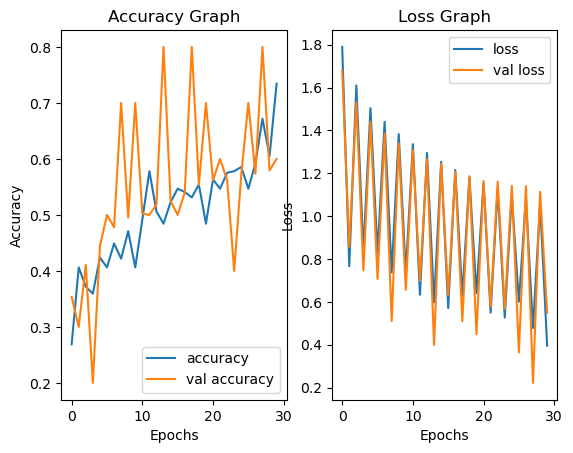

In [10]:
import matplotlib.pyplot as plt
 
# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()